In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data = pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/501.csv')

In [168]:
data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [169]:
data.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [170]:
data= data.dropna()

In [171]:
data.isna().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [172]:
data['label'].value_counts()

1    62872
7    14562
6    14376
8     9578
3     1876
5      504
4       92
Name: label, dtype: int64

Text(0.5, 1.0, 'label')

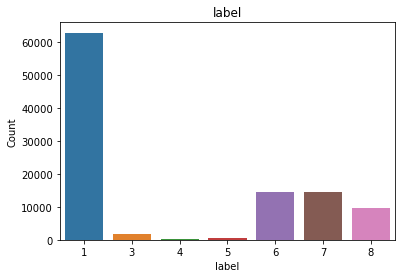

In [173]:
sns.countplot(data = data, x="label")
plt.xlabel("label")
plt.ylabel("Count")
plt.title("label")

In [174]:
data=data.sample(frac=0.05)

In [175]:
data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
86164,11:09.2,-0.960693,-0.230713,-0.536133,-1.359619,-0.233154,0.007080,1
29921,52:24.4,-0.976074,-0.111572,-0.350098,-0.883301,-0.268311,-0.150391,1
16483,47:36.7,-0.932373,-0.026855,-0.359375,-0.972412,-0.149414,-0.187500,1
78603,08:38.0,-0.776611,-0.139893,-0.194092,-0.346191,0.040771,-0.185303,1
72777,06:41.5,-1.149658,-0.039307,-0.280518,-0.770508,-0.536133,-0.209961,1
...,...,...,...,...,...,...,...,...
51004,59:26.0,-1.360107,-0.339355,-0.507080,-0.353760,-0.272217,0.740479,1
3088,43:05.6,-0.687500,0.060547,-0.783936,-0.955811,-0.061523,-0.301025,6
82071,09:47.4,-1.221191,-0.222656,-0.420898,-1.809326,0.000488,0.356689,1
1101,42:25.9,-0.906738,-0.031250,0.359863,-0.953125,-0.010010,0.115479,6


In [186]:
#Splitting the data into training and test test
X = data.iloc[:,1:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [190]:
X

array([[-9.606930e-01, -2.307130e-01, -5.361330e-01, -1.359619e+00,
        -2.331540e-01,  7.080000e-03],
       [-9.760740e-01, -1.115720e-01, -3.500980e-01, -8.833010e-01,
        -2.683110e-01, -1.503910e-01],
       [-9.323730e-01, -2.685500e-02, -3.593750e-01, -9.724120e-01,
        -1.494140e-01, -1.875000e-01],
       ...,
       [-1.221191e+00, -2.226560e-01, -4.208980e-01, -1.809326e+00,
         4.880000e-04,  3.566890e-01],
       [-9.067380e-01, -3.125000e-02,  3.598630e-01, -9.531250e-01,
        -1.001000e-02,  1.154790e-01],
       [-1.391600e-01, -1.562500e-02,  9.062500e-01, -1.298830e-01,
        -1.362300e-01, -1.078125e+00]])

In [191]:
X.shape

(5193, 6)

In [192]:
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [193]:
Y.shape

(5193, 7)

In [197]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(60,input_shape=(6,),activation='ReLU'))
model.add(Dense(60,activation='ReLU'))
model.add(Dense(40,activation='ReLU'))
model.add(Dense(40,activation='ReLU'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 60)                420       
                                                                 
 dense_65 (Dense)            (None, 60)                3660      
                                                                 
 dense_66 (Dense)            (None, 40)                2440      
                                                                 
 dense_67 (Dense)            (None, 40)                1640      
                                                                 
 dense_68 (Dense)            (None, 7)                 287       
                                                                 
Total params: 8,447
Trainable params: 8,447
Non-trainable params: 0
_________________________________________________________________


In [198]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
130/130 [==============================] - 1s 5ms/step - loss: 0.3845 - accuracy: 0.8893 - val_loss: 0.2605 - val_accuracy: 0.9307
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.9278 - val_loss: 0.2291 - val_accuracy: 0.9403
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.9348 - val_loss: 0.2107 - val_accuracy: 0.9461
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9444 - val_loss: 0.1987 - val_accuracy: 0.9490
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9429 - val_loss: 0.2145 - val_accuracy: 0.9384
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 0.9468 - val_loss: 1.0998 - val_accuracy: 0.9047
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.9413 - val_loss: 0.2009 - val_accuracy: 0.9480

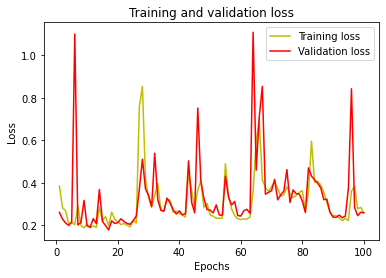

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

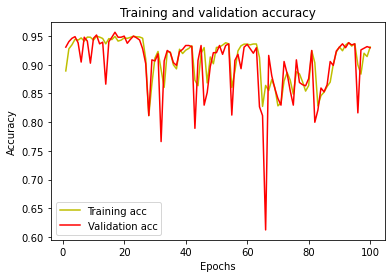

In [200]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [201]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       621
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.92      0.75      0.83       151
           5       0.99      1.00      0.99       138
           6       1.00      1.00      1.00       103

    accuracy                           0.93      1039
   macro avg       0.54      0.53      0.54      1039
weighted avg       0.91      0.93      0.92      1039

[[611   0   0   0   8   2   0]
 [ 17   0   0   0   2   0   0]
 [  2   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0]
 [ 37   0   0   0 114   0   0]
 [  0   0   0   0   0 138   0]
 [  0   0   0   0   0   0 103]]


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
